# Bag of Words Meets Bags of Popcorn

## 1. Data 분석

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 데이터 크기

In [2]:
DATA_IN_PATH = '.\\data\\'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [3]:
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


### 데이터 개수

In [4]:
print('전체 학습데이터 개수 : {}'.format(len(train_data)))

전체 학습데이터 개수 : 25000


### 각 리뷰의 문자 길이 분포

In [5]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

<ipython-input-6-6fa7bed82146>:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


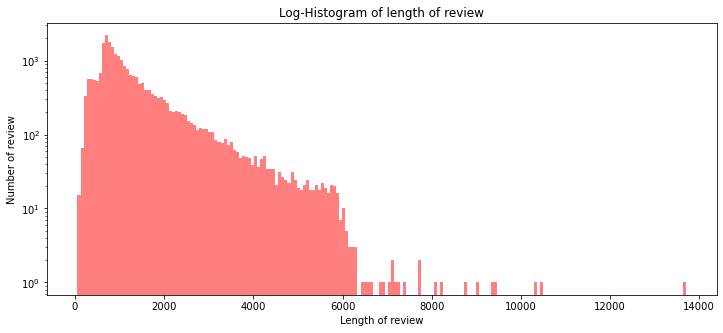

In [6]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
# 히스토그램 선언
# bins : 히스토그램 값들에 대한 버켓 범위
# range : x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review');

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71056
리뷰 길이 표준편차 값: 1005.2191407969142
리뷰 길이 중간 값: 983.0
리뷰 길이 제 1 사분위: 705.0
리뷰 길이 제 3 사분위: 1619.0


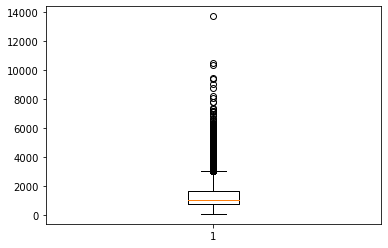

In [7]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차 값: {}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))
plt.boxplot(train_length);

### 많이 사용된 단어

(-0.5, 799.5, 599.5, -0.5)

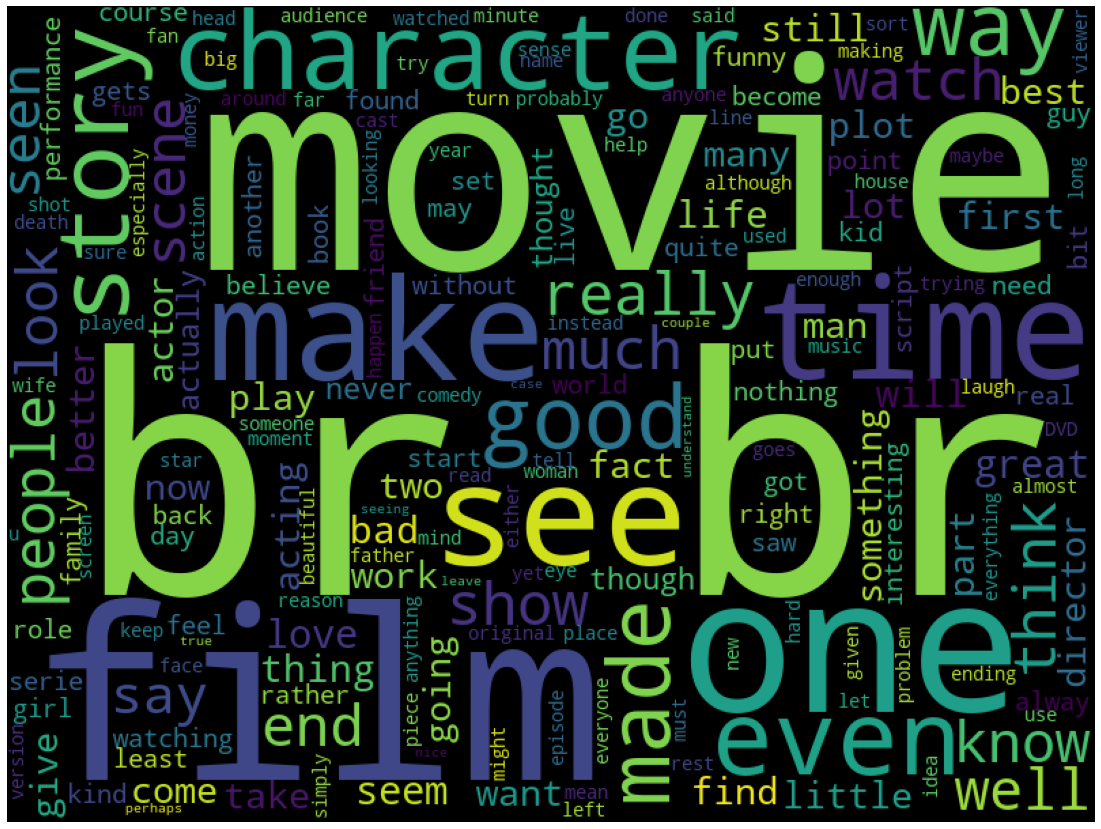

In [8]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

### 긍, 부정 데이터의 분포

C:\Users\saeji\anaconda3\envs\py3.8_tf2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


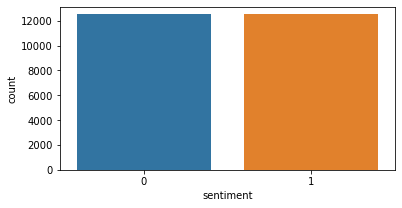

In [9]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment']);

In [10]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


### 각 리뷰의 단어 개수 분포

In [11]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

<ipython-input-12-eed9ec02d129>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

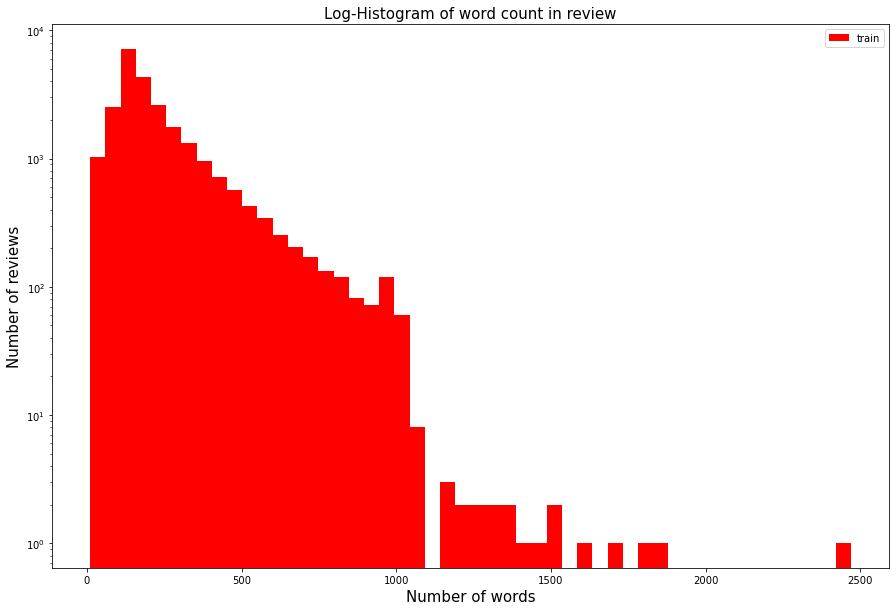

In [12]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [13]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))

print('물음표가 있는 지문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 지문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 지문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 지문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 지문: {:.2f}%'.format(numbers * 100))

물음표가 있는 지문: 29.55%
마침표가 있는 지문: 99.69%
첫 글자가 대문자인 지문: 0.00%
대문자가 있는 지문: 99.59%
숫자가 있는 지문: 56.66%


## 2. Data 전처리

In [14]:
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [15]:
train_data['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [16]:
review = train_data['review'][0]
review_text = BeautifulSoup(review, "html5lib").get_text() #  HTML tag 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text) # 알파벳을 제외하고 모두 공백으로 바꿈
review_text

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [17]:
# 영어 불용어들의 set을 만든다
stop_words = set(stopwords.words('english'))

# 소문자로 변환 후 불용어를 제거한 리스트 생성
review_text = review_text.lower()
words = review_text.split()
words = [w for w in words if w not in stop_words]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [18]:
# 단어 리스트들을 다시 하나의 글로 합친다.
clean_review = ' '.join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [19]:
def preprocessing(review, remove_stopwords = False):
    # 불용어 제거하는 옵션 선택 가능
    
    # 1. HTML tag 제거
    review_text = BeautifulSoup(review, "html5lib").get_text()
    
    # 2. 알파벳을 제외하고 모두 공백으로 변경
    review_text = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. 대문자를 소문자로 변경 후 공백단위로 text를 나누어서 리스트 생성
    words = review_text.lower().split()
    
    if remove_stopwords:
        # 4. 불용어들을 제거
        
        # 영어에 관련된 불용어 불러오기
        stops = set(stopwords.words('english'))
        # 불용어가 아닌 단어들로 이루어진 새로운 리스트 생성
        words = [w for w in words if w not in stop_words]
        # 5. 단어 리스트를 공백을 넣어서 하나의 글로 합친다.
        clean_review = ' '.join(words)
        
    else:
        clean_review = ' '.join(words)
        
    return clean_review

In [20]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, True))
    
# 전처리한 데이터 출력
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [21]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews,
                               'sentiment': train_data['sentiment']})

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [23]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
print("전체 단어 개수: ", len(word_vocab))

전체 단어 개수:  74066


In [24]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [25]:
# 가장 긴 review의 길이
max([len(t) for t in text_sequences])

1416

In [26]:
# MAX_SEQUENCE_LENGTH = 174
MAX_SEQUENCE_LENGTH = 1416

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 1416)


In [27]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor: ', train_labels.shape)

Shape of label tensor:  (25000,)


In [28]:
# 가장 마지막 최종에서 사용
tokenizer_inputs = train_inputs.copy()
tokenizer_labels = train_labels.copy()

In [29]:
## test_clean.csv 생성

# 1. Data 불러오기
test_data = pd.read_csv(DATA_IN_PATH + 'testData.tsv', header = 0, delimiter = '\t', quoting = 3)
# test_data.head()

# 2. Data 전처리
clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, True))

# 3. DataFrame으로 만들기
clean_test_df = pd.DataFrame({'review': clean_test_reviews})

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_test_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)

test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of test data: ', test_inputs.shape)

Shape of test data:  (25000, 1416)


In [30]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
TEST_CLEAN_DATA = 'test_clean.csv'
DATA_CONFIGS = 'data_configs.json'

# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

In [31]:
# 전처리 된 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

## 3. 모델 선택 및 예측

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
DATA_OUT_PATH = '.\\data\\data_out\\'
TRAIN_CLEAN_DATA = 'train_clean.csv'

RANDOM_SEED = 42
TEST_SPLIT = 0.2

In [34]:
train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)
train_data.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [35]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [36]:
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='word', sublinear_tf=True,
                            ngram_range=(1, 3), max_features=20000)

X = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

# 가장 마지막 최종에서 사용
TF_IDF_inputs = X.copy()
TF_IDF_labels = y.copy()

In [37]:
feature = vectorizer.get_feature_names()
len(feature)

20000

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT,
                                                   random_state=RANDOM_SEED)

In [39]:
lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [40]:
predicted = lgs.predict(X_test)

In [41]:
print("Accuracy: %f" % lgs.score(X_test, y_test))

Accuracy: 0.895600


In [42]:
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

In [43]:
testDataVecs = vectorizer.transform(test_data['review'])

In [44]:
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 1 ... 0 1 1]


# Word2Vec Feature Example

In [45]:
import os
import re

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [46]:
DATA_OUT_PATH = '.\\data\\data_out\\'
TRAIN_CLEAN_DATA = 'train_clean.csv'

RANDOM_SEED = 42
TEST_SPLIT = 0.2

In [47]:
train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)

In [48]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [49]:
sentences = []
for review in reviews:
    sentences.append(review.split())

In [50]:
num_features = 300
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3

In [51]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
                   level=logging.INFO)

In [52]:
from gensim.models import word2vec

model = word2vec.Word2Vec(sentences, workers=num_workers,\
                         vector_size=num_features, min_count=min_word_count,\
                         window=context, sample=downsampling)

C:\Users\saeji\anaconda3\envs\py3.8_tf2.0\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
2021-07-06 23:27:39,592 : INFO : collecting all words and their counts
2021-07-06 23:27:39,593 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-06 23:27:39,761 : INFO : PROGRESS: at sentence #10000, processed 1205223 words, keeping 51374 word types
2021-07-06 23:27:39,942 : INFO : PROGRESS: at sentence #20000, processed 2396605 words, keeping 67660 word types
2021-07-06 23:27:40,037 : INFO : collected 74065 word types from a corpus of 2988089 raw words and 25000 sentences
2021-07-06 23:27:40,038 : INFO : Creating a fresh vocabulary
2021-07-06 23:27:40,081 : INFO : Word2Vec lifecyc

In [53]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features), dtype=np.float32)
    
    num_words = 0
    index2word_set = set(model.wv.index_to_key)
#     index2word_set = set(model.wv.index2word)
    
    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[w])
            
    feature_vector - np.divide(feature_vector, num_words)
    return feature_vector

In [54]:
def get_dataset(reviews, model, num_features):
    dataset = list()
    
    for s in reviews:
        dataset.append(get_features(s, model, num_features))
        
    reviewFeatureVecs = np.stack(dataset)
    
    return reviewFeatureVecs

In [55]:
test_data_vecs = get_dataset(sentences, model, num_features)

In [56]:
from sklearn.model_selection import train_test_split

X = test_data_vecs
y = np.array(sentiments)

# 가장 마지막 최종에서 사용
W2V_inputs = X.copy()
W2V_labels = y.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT,\
                                                    random_state=RANDOM_SEED)

In [57]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)

C:\Users\saeji\anaconda3\envs\py3.8_tf2.0\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [58]:
print("Accuracy: %f" % lgs.score(X_test, y_test))

Accuracy: 0.868800


# Random Forest

In [59]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer

DATA_OUT_PATH = '.\\data\\data_out\\'
TRAIN_CLEAN_DATA = 'train_clean.csv'

RANDOM_SEED = 42
TEST_SPLIT = 0.2

In [60]:
train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)

In [61]:
reviews = list(train_data['review'])
y = np.array(train_data['sentiment'])

### CountVectorizer를 활용한 벡터화

In [62]:
vectorizer = CountVectorizer(analyzer = 'word', max_features = 5000)

train_data_features = vectorizer.fit_transform(reviews)

# 최종에 사용될 데이터
countVectorizer_inputs = train_data_features.copy()
countVectorizer_labels = y.copy()

### 학습과 검증 데이터 분리

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train_data_features, y, test_size=TEST_SPLIT,
                                                   random_state=RANDOM_SEED)

### 모델 구현 및 학습

In [65]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기에 1000개 의사 결정 트리를 사용한다
forest = RandomForestClassifier(n_estimators = 1000)

# 단어 묶음을 벡터화한 데이터와 정답 데이터를 가지고 학습을 시작한다.
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [66]:
print("Accuracy: %f" % forest.score(X_test, y_test)) # 검증함수로 정확도 측정

Accuracy: 0.850400


In [67]:
print("Accuracy: %f" % forest.score(X_test, y_test)) # 검증함수로 정확도 측정

Accuracy: 0.850400


---

## 최종 정리

In [68]:
# Tokenizer를 활용한 학습 데이터
tokenizer_inputs
tokenizer_labels

# TF-IDF를 활용한 학습 데이터
TF_IDF_inputs
TF_IDF_labels

# Word2Vec를 활용한 학습 데이터
W2V_inputs
W2V_labels

# countVectorizer를 활용한 학습 데이터
countVectorizer_inputs
countVectorizer_labels

inputs = [tokenizer_inputs, countVectorizer_inputs, TF_IDF_inputs, W2V_inputs]
labels = [tokenizer_labels, countVectorizer_labels, TF_IDF_labels, W2V_labels]

input_data = {}
input_data['tokenizer'] = (inputs[0], labels[0])
input_data['CountVectorizer'] = (inputs[1], labels[1])
input_data['TF-IDF'] = (inputs[2], labels[2])
input_data['W2V'] = (inputs[3], labels[3])
# input_data

In [69]:
def train_n_score(ml_model, X, y, RANDOM_SEED = 42, TEST_SPLIT = 0.2):
    # Logistic Regression
    if ml_model == 'Logistic Regression':
        from sklearn.linear_model import LogisticRegression
        model = LogisticRegression(class_weight='balanced')
        
    # RandomForest
    elif ml_model == 'RandomForest':
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(n_estimators = 1000)
    else:
        print("Recheck the ML model")
        return -1
        
        
    # 데이터 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT,
                                                   random_state=RANDOM_SEED)
    
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print("{} Accuracy: {}".format(ml_model, accuracy))
    return model, accuracy

In [70]:
# 사용할 머신러닝 모델 - Logistic Regression, RandomForest
ml_models = ('Logistic Regression', 'RandomForest')

trained_models = {}

for ml_model in ml_models:
    for input_ in input_data.keys():
        print("word vectorize method : {}".format(input_))
        trained_models[(ml_model, input_)] = train_n_score(ml_model, input_data[input_][0], input_data[input_][1])

word vectorize method : tokenizer


C:\Users\saeji\anaconda3\envs\py3.8_tf2.0\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5072
word vectorize method : CountVectorizer


C:\Users\saeji\anaconda3\envs\py3.8_tf2.0\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8592
word vectorize method : TF-IDF
Logistic Regression Accuracy: 0.8956
word vectorize method : W2V


C:\Users\saeji\anaconda3\envs\py3.8_tf2.0\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8688
word vectorize method : tokenizer
RandomForest Accuracy: 0.5588
word vectorize method : CountVectorizer
RandomForest Accuracy: 0.8566
word vectorize method : TF-IDF
RandomForest Accuracy: 0.8678
word vectorize method : W2V
RandomForest Accuracy: 0.8484


In [71]:
temp_dict = {key:value[1] for key, value in trained_models.items()}
# temp = [('Logistic Regression', 'tokenizer'), ('Logistic Regression', 'CountVectorizer'), ('Logistic Regression', 'TF-IDF'), ('Logistic Regression', 'W2V'), ('RandomForest', 'tokenizer'), ('RandomForest', 'CountVectorizer'), ('RandomForest', 'TF-IDF'), ('RandomForest', 'W2V')]
# temp_dict = dict.fromkeys(temp)
# temp_dict[('Logistic Regression', 'tokenizer')] = 0.507
# temp_dict[('Logistic Regression', 'CountVectorizer')] = 0.8592 
# temp_dict[('Logistic Regression', 'TF-IDF')] = 0.8956
# temp_dict[('Logistic Regression', 'W2V')] = 0.8686
# temp_dict[('RandomForest', 'tokenizer')] = 0.5662
# temp_dict[('RandomForest', 'CountVectorizer')] = 0.856
# temp_dict[('RandomForest', 'TF-IDF')] = 0.8688
# temp_dict[('RandomForest', 'W2V')] = 0.8478
temp_dict

{('Logistic Regression', 'tokenizer'): 0.5072,
 ('Logistic Regression', 'CountVectorizer'): 0.8592,
 ('Logistic Regression', 'TF-IDF'): 0.8956,
 ('Logistic Regression', 'W2V'): 0.8688,
 ('RandomForest', 'tokenizer'): 0.5588,
 ('RandomForest', 'CountVectorizer'): 0.8566,
 ('RandomForest', 'TF-IDF'): 0.8678,
 ('RandomForest', 'W2V'): 0.8484}

In [73]:
midx = pd.MultiIndex.from_tuples(temp_dict.keys())
accuracy = [temp_dict[key] for key in temp_dict.keys()]

In [75]:
result = pd.DataFrame({'Accuracy':accuracy}, index=temp_dict)
result.index.names = ['Model', 'vertorizer']
result

Accuracy
Model               vertorizer               
Logistic Regression tokenizer          0.5072
                    CountVectorizer    0.8592
                    TF-IDF             0.8956
                    W2V                0.8688
RandomForest        tokenizer          0.5588
                    CountVectorizer    0.8566
                    TF-IDF             0.8678
                    W2V                0.8484